In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.mpl_style = 'default'
import collections

from campaign_analysis import *


Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 30 days


In [2]:
start = '2014-11-28 00:00'
stop = '2015-01-03 00:00'

click = get_clicks(start, stop)
don = get_donations(start, stop)
imp = get_impressions(start, stop)

In [5]:
desk_regs = {
    'Large Desk': '.*5C_lg.* C14_en5C_dec_dsk_FR',
    'Top Desk': '.*5C_tp.* C14_en5C_dec_dsk_FR',
}

In [6]:
mob_regs = {
    'Large Mobile': '.*_lg.* C14_en5C_dec_mob_FR',
    'Top Mobile': '.*_tp.* C14_en5C_dec_mob_FR'
}

ipd_regs = {
    'Large Ipad': '.*_lg.* C14_en5C_dec_ipd_FR',
    'Top Ipad': '.*_tp.* C14_en5C_dec_ipd_FR'
}


Large:
    - first impression
    - appears only once per client
Top: 
    - appears on every pageview
    - hidden for a week if the banner is closed
    - on 17th limited to five impressions since campaign start
    - on 24th limited to five impressions in the year
    - lifted limits for New Years

When you donate, impressions stop.

Staggered launch: Email, Desktop, Mobile + Ipad

##Impressions: top vs full  

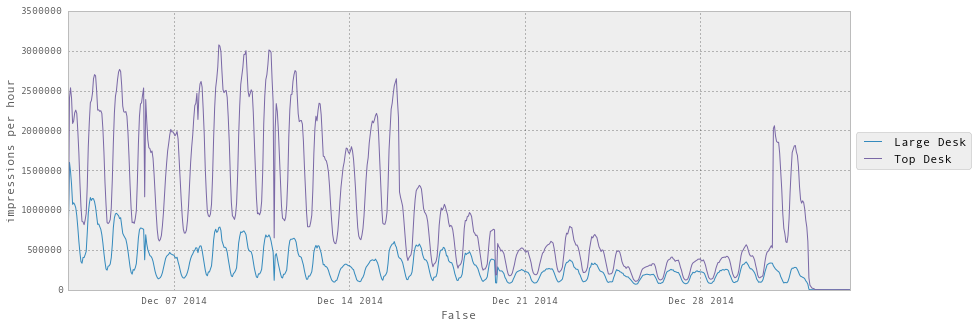

In [38]:
config = {
            'hours' :1, 
            'start' : '2014-11-28 00:00',
            'ylabel': 'impressions per hour'
}

plot_by_time(imp, desk_regs, **config )


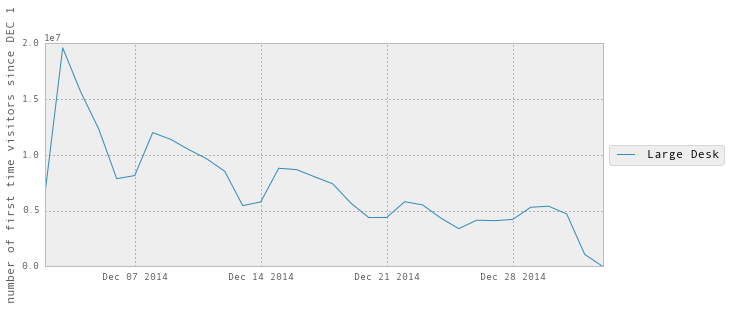

In [30]:
config = {
            'hours' :24, 
            'start': '2014-12-1 00',
            'ylabel': 'number of first time visitors since DEC 1'
}

plot_by_time(imp, {'Large Desk': '.*5C_lg.* C14_en5C_dec_dsk_FR'}, **config )

By the end the campaign, we are still getting roughly 5 million fullscreen pageviews per day! This is a proxy for the number of clients visiting for the first time since Dec 2.

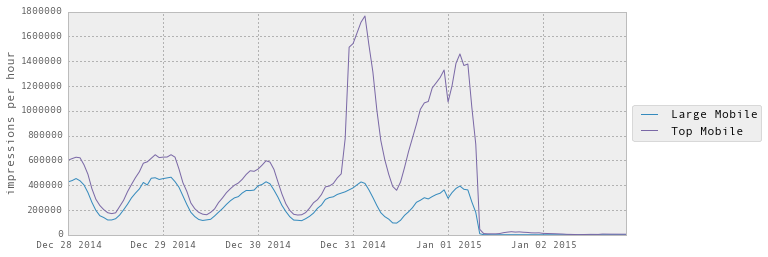

In [20]:
import mpld3
mpld3.disable_notebook()

config = {
            'hours' :1, 
            'start': '2014-12-1 00',
            'ylabel': 'impressions per hour',
            'start': '2014-12-28 00'

}
plot_by_time(imp, mob_regs, **config )


Difference in impression rate between banner types is much lower than on desktop. Due to shorter sessions?

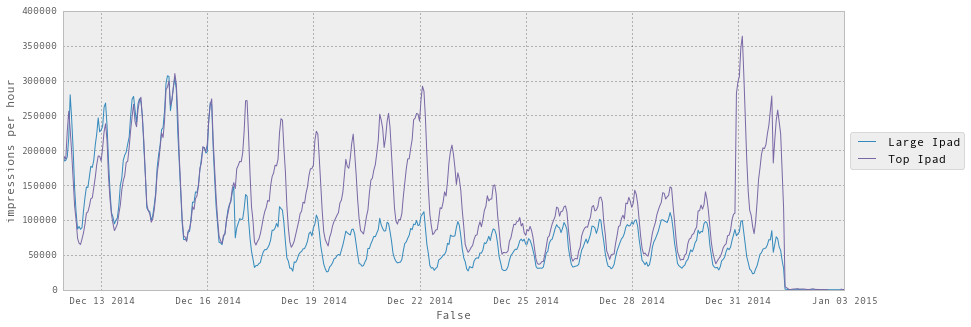

In [39]:
config = {
            'hours' :1, 
            'ylabel': 'impressions per hour'
}
plot_by_time(imp, ipd_regs, **config )


##Donations: top vs full 

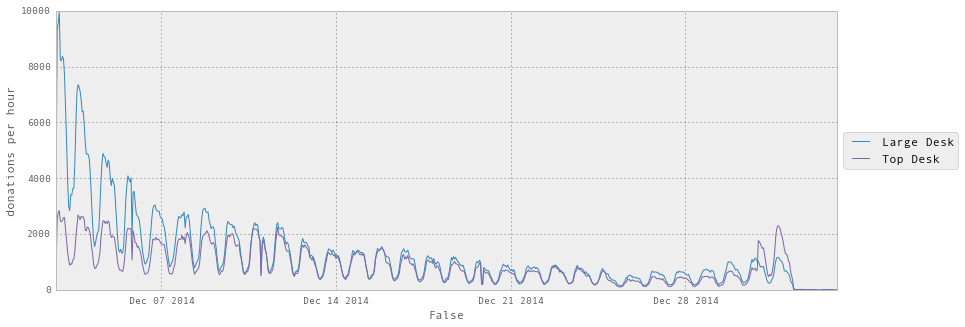

In [40]:
config = {
            'hours' :1, 
            'ylabel': 'donations per hour'
}

plot_by_time(don, desk_regs, **config)


Through out the campaign, the Large banner generates at least as many donations as the top screen banner, except on the New Year's day push. 

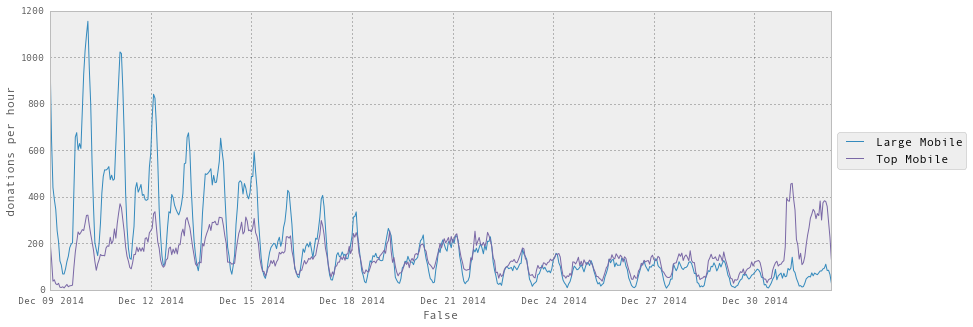

In [41]:
config = {
            'hours' :1, 
            'start': '2014-12-8 00',
            'ylabel': 'donations per hour'
}
plot_by_time(don, mob_regs, **config )


Same as above

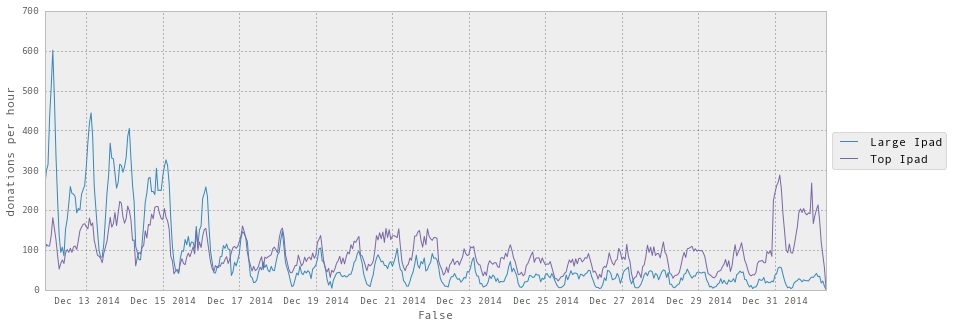

In [42]:
config = {
            'hours' :1, 
            'start': '2014-12-8 00',
            'ylabel': 'donations per hour'
}
plot_by_time(don, ipd_regs, **config )



On the Ipad, the top screen banners quickly lead to fewer donations than the large screen  banners.

#Donation Rate: top vs full

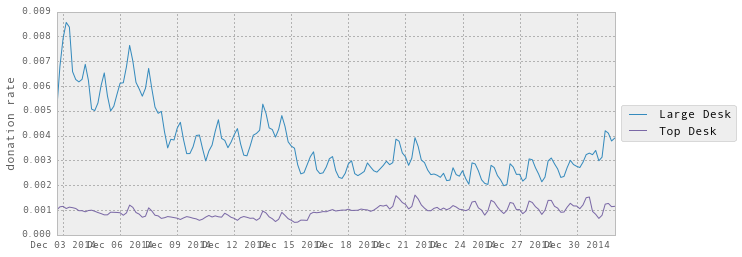

In [123]:
config = {
            'hours' :4, 
            'stop': '2015-01-01 00',


        }

plot_rate_by_time(don, imp, desk_regs, **config)

At launch, the large banner gets a donation from every 100 impressions!

At launch, the top screen banner is an order of magnitude less effective, (note: this population did not donate on their full-screen  banner).

Top screen donation rate lifts around the 17th due to the limit on impressions per client.

We have a remarkably high donation rate from infrequent visitors (see late Large banner donation rate)



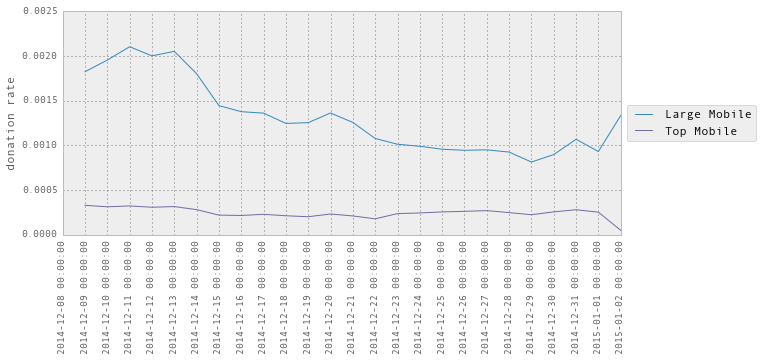

In [15]:
config = {
            'hours' :24, 
            'start': '2014-12-8 00',
        }

plot_rate_by_time(don, imp, mob_regs, **config )

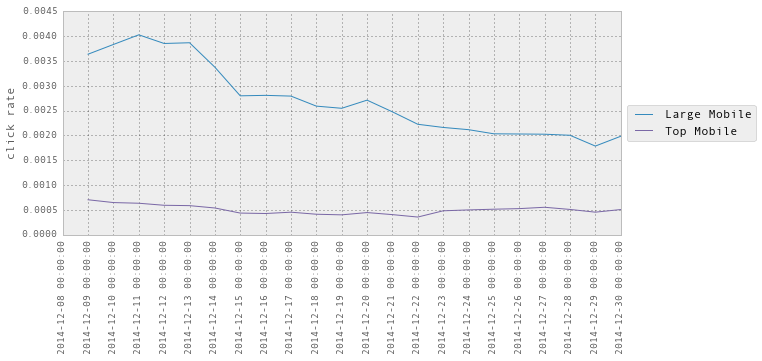

In [18]:
config = {
            'hours' :24, 
            'start': '2014-12-8 00',
            'stop': '2014-12-30',
            'ylabel': 'click rate'
        }

plot_rate_by_time(click, imp, mob_regs, **config )

The donation rate of the large banner declines faster than on desktop.

Eventually it is no more effective than the top screen banner. 

Donation rates are 5x lower. Note: email and desktop campaigns have already been running for a week!!

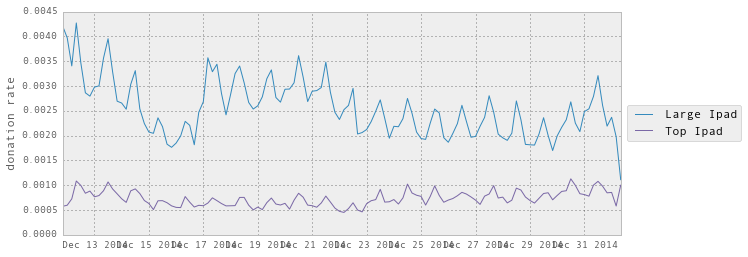

In [116]:
config = {
            'hours' :4, 
            'stop': '2015-01-01 10',
        }

plot_rate_by_time(don, imp, ipd_regs, **config )

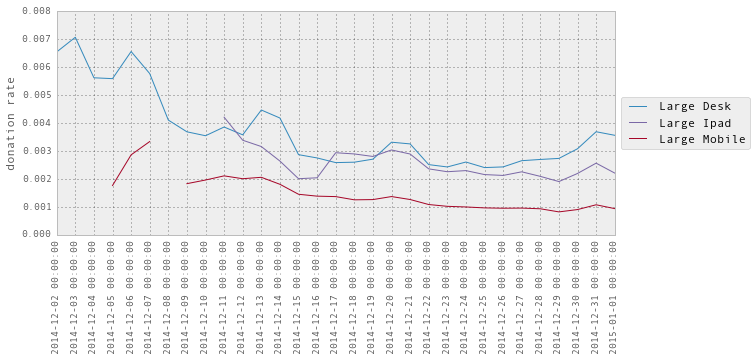

In [100]:
config = {
            'hours' :24, 
            'stop': '2015-01-01 10',
        }

regs = collections.OrderedDict()

regs['Large Desk']= '.*5C_lg.* C14_en5C_dec_dsk_FR'
regs['Large Ipad'] = '.*_lg.* C14_en5C_dec_ipd_FR'
regs['Large Mobile'] = '.*_lg.* C14_en5C_dec_mob_FR'



plot_rate_by_time(don, imp, regs, **config )

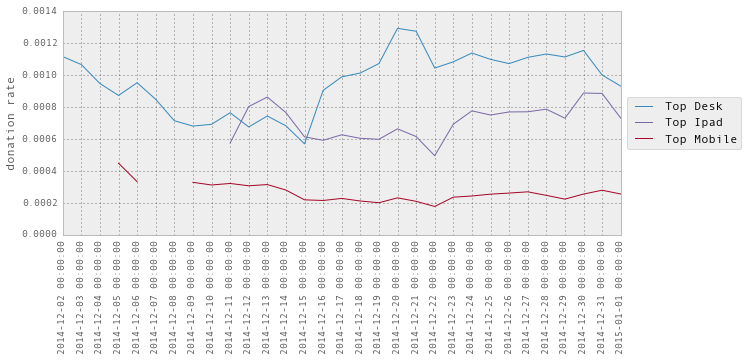

In [101]:
config = {
            'hours' :24, 
            'stop': '2015-01-01 10',
        }

regs = collections.OrderedDict()
regs['Top Desk']= '.*5C_tp.* C14_en5C_dec_dsk_FR'
regs['Top Ipad'] = '.*_tp.* C14_en5C_dec_ipd_FR'
regs['Top Mobile'] = '.*_tp.* C14_en5C_dec_mob_FR'

plot_rate_by_time(don, imp, regs, **config )

The full screen banner eventually becomes less effective than the top screen banner.

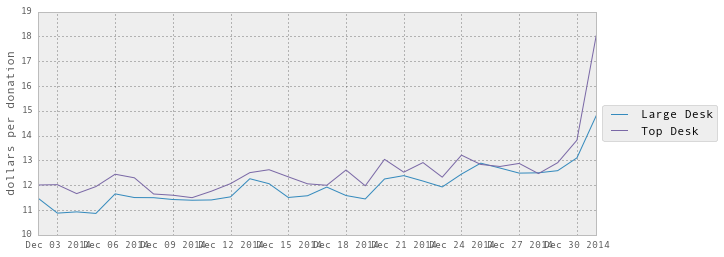

In [76]:
plot_avg(don, desk_regs, hours = 24, stop = '2014-12-31')

##AverEG Amount per Hour (Skip)

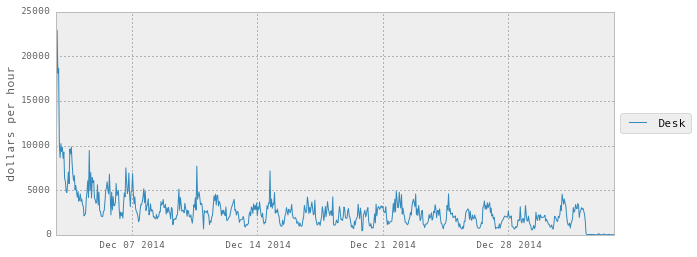

In [52]:
config = {
        'hours' : 1, 
        'amount' : True,
        #'start' : '2014-12-2 19',
        'ylabel' : 'dollars per hour',
}
fig = plot_by_time(don, {'Desk':'.* C14_en5C_dec_dsk_FR'}, **config )

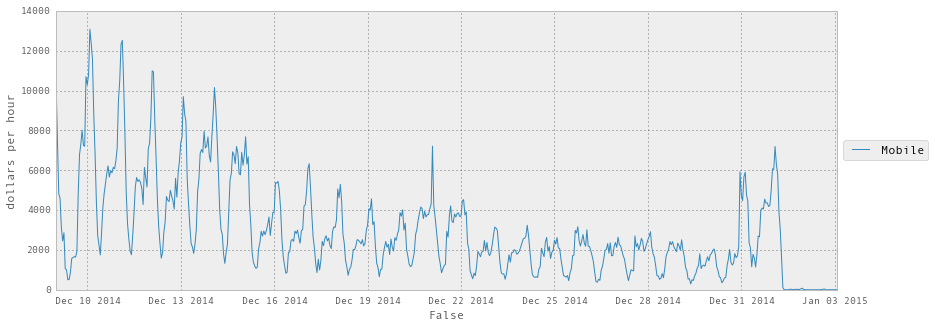

In [47]:
config = {
        'hours' : 1, 
        'amount' : True,
        'start' : '2014-12-8 00',
        'ylabel' : 'dollars per hour'
}

regs = {
    'Mobile':'.* C14_en5C_dec_mob_FR',
}
fig = plot_by_time(don, regs, **config )

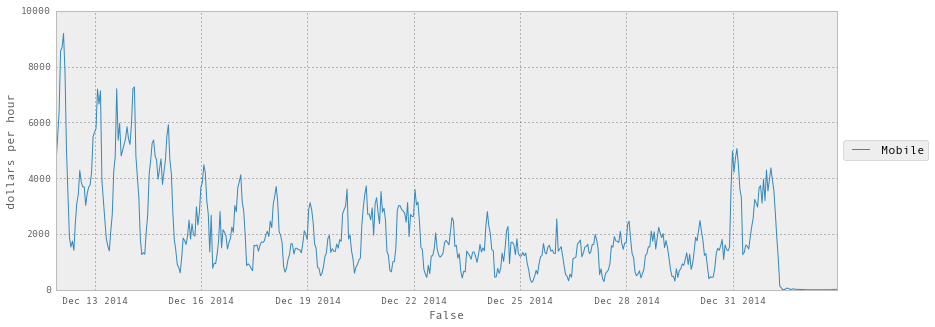

In [46]:
config = {
        'hours' : 1, 
        'amount' : True,
        'start' : '2014-12-8 00',
        'ylabel' : 'dollars per hour'
}

regs = {
    'Mobile':'.* C14_en5C_dec_ipd_FR',
}
fig = plot_by_time(don, regs, **config )

#Amount per Day

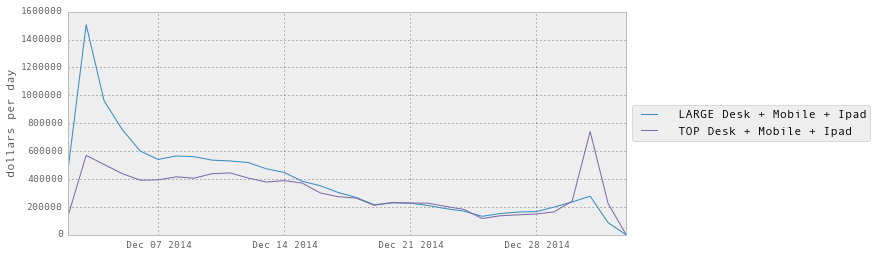

In [33]:
config = {
        'hours' : 24, 
        'amount' : True,
        'start' : '2014-12-2 00',
        'ylabel' : 'dollars per day'
}

regs = {
    #'Desk + Mobile + Ipad':'.* C14_en5C_dec_*',
    ' TOP Desk + Mobile + Ipad':'.*_tp.* C14_en5C_dec_*',
    ' LARGE Desk + Mobile + Ipad':'.*_lg.* C14_en5C_dec_*'

}
fig = plot_by_time(don, regs, **config )

We make as much money on our first impression (with large banner) as we do on all other impressions

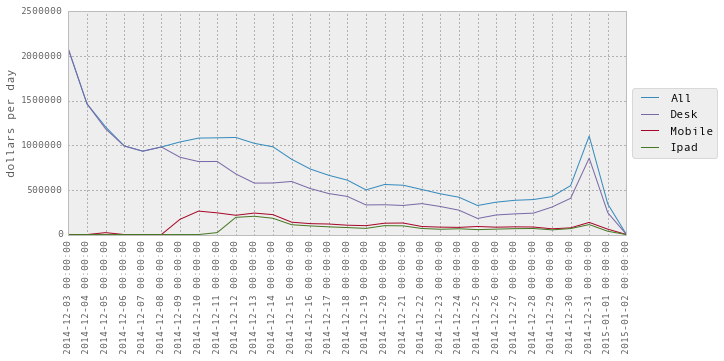

In [127]:
config = {
        'hours' : 24, 
        'amount' : True,
        'start' : '2014-12-3 00',
        #'stop'  : '2014-12-18 23:59',
        'ylabel' : 'dollars per day'
}

regs = collections.OrderedDict()
regs['All']= '.* C14_en5C_dec*'
regs['Desk'] = '.* C14_en5C_dec_dsk*'
regs['Mobile'] = '.* C14_en5C_dec_mob*'
regs['Ipad'] = '.* C14_en5C_dec_ipd*'



fig = plot_by_time(don, regs, **config )

How do the different device campaigns interact? What is the marginal value of the mobile cmapaigns?

With the data we have we cannot tell. The data supports all theories :).

## Cumulative Total per Day

,Desk en5C_dec,all-banner,en5C_dec,Ipad en5C_dec,Mobile en5C_dec
0,19185091.79,25809463.28,24283227.98,1948175.88,3149960.31


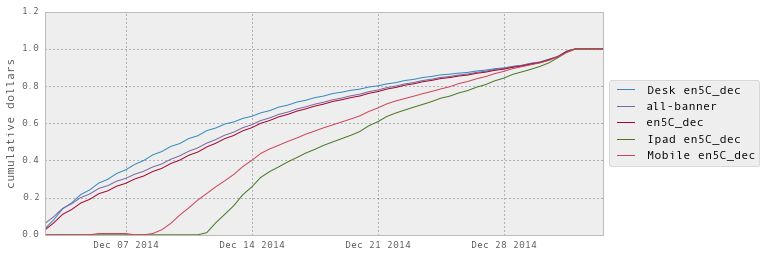

In [85]:
config = {
    'hours': 12,
    'amount': True,
    'cum' : True,
    'ylabel' : 'cumulative dollars',
    'interactive': False,
    'normalize' : True
}

regs = {
    'all-banner': '.*',
    'en5C_dec':'.* C14_en5C_dec*',
    'Desk en5C_dec':'.* C14_en5C_dec_dsk*',
    'Mobile en5C_dec':'.* C14_en5C_dec_mob*',
    'Ipad en5C_dec':'.* C14_en5C_dec_ipd*'

}

plot_by_time(don,regs , **config)

# Get Total by 
d_totals = pd.DataFrame()
for name, reg in regs.items():
    counts = don.ix[don.name.str.match(reg).apply(bool)]['amount']
    d_totals[name] = [counts.sum()]
d_totals

We have made half the money we will make a third of the way in

In [120]:
# donations 

regs = desk_regs
d_totals = pd.DataFrame()
for name, reg in regs.items():
    counts = don.ix[don.name.str.match(reg).apply(bool)]['amount']
    d_totals[name] = [counts.sum()]
d_totals

,Large Desk,Top Desk
0,10944414.75,8239448.1


In [119]:
# donations 

regs = desk_regs
d_totals = pd.DataFrame()
for name, reg in regs.items():
    counts = don.ix[don.name.str.match(reg).apply(bool)]['n']
    d_totals[name] = [counts.sum()]
d_totals


,Large Desk,Top Desk
0,944141,654684


In [128]:
# impressions
d_totals = pd.DataFrame()
for name, reg in desk_regs.items():
    counts = imp.ix[imp.name.str.match(reg).apply(bool)]['n']
    d_totals[name] = [counts.sum()]
d_totals

,Large Desk,Top Desk
0,228418400,759396000


In [129]:
d_totals = pd.DataFrame()
for name, reg in mob_regs.items():
    counts = imp.ix[imp.name.str.match(reg).apply(bool)]['n']
    d_totals[name] = [counts.sum()]
d_totals

,Large Mobile,Top Mobile
0,191529500,338426700
